In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, ParameterGrid, cross_val_score, RepeatedKFold, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings  as ws
ws.filterwarnings("ignore")

# Here we will be reading the dataset which is in the CSV format

In [11]:
diabetes_df = pd.read_csv("diabetes-dataset.csv")
diabetes_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


# Information about the dataset

In [7]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


# Getting the surface level information and shape

In [8]:
# print out the head,tail and sample of the dataframe and the shape


diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [9]:
diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


In [10]:
diabetes_df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1889,1,95,66,13,38,19.6,0.334,25,0
740,11,120,80,37,150,42.3,0.785,48,1
1054,1,89,24,19,25,27.8,0.559,21,0
1185,2,175,88,0,0,22.9,0.326,22,0
789,6,194,78,0,0,23.5,0.129,59,1
57,0,100,88,60,110,46.8,0.962,31,0
1763,6,195,70,0,0,30.9,0.328,31,1
1364,8,196,76,29,280,37.5,0.605,57,1
65,5,99,74,27,0,29.0,0.203,32,0
384,1,125,70,24,110,24.3,0.221,25,0


# Seperating the data into Features and Label

In [ ]:
X_features = diabetes_df[['Pregnancies,'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
Y_feature = diabetes_df['Outcome']

# Observations in the data

In [11]:
diabetes_df.shape

(2000, 9)

Insight: We have 2000 rows and 9 columns and the total amout of storage consumed by the data is 140.8kg

# Exploratory Data Analysis (EDA)

In [8]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# To know more about the dataset with transpose – here T is for the transpose

In [4]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


# Now let’s check that if our dataset have null values or not

In [14]:
# check for missing values
diabetes_df.isnull().sum()m

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no missing value

In [5]:
diabetes_df["Outcome"].value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

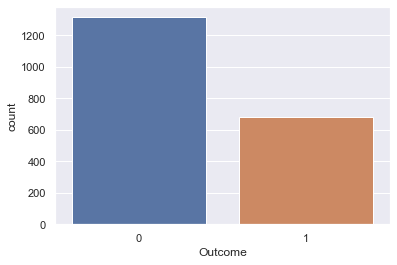

In [6]:
sns.set()
sns.countplot(diabetes_df["Outcome"])
plt.show()

# Check outliers

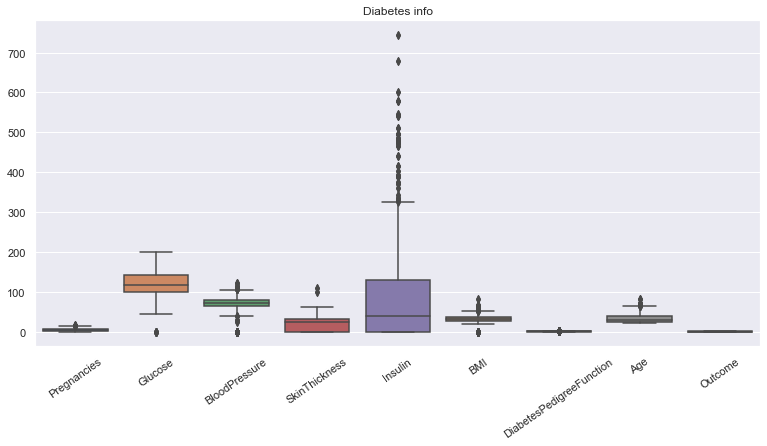

In [10]:
plt.figure(figsize=(13,6))
ax = sns.boxplot(data = diabetes_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=35)
plt.title("Diabetes info")
plt.show()

# Drop outliers

<AxesSubplot:ylabel='Pregnancies'>

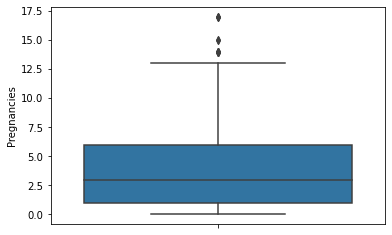

In [16]:
sns.boxplot(y='Pregnancies',data=diabetes_df)

 Let's treat the outlier for Pregnancies

In [6]:
diabetes_df['Pregnancies'].mean()

3.7035

In [9]:
dat1=diabetes_df[diabetes_df['Pregnancies']<11]


<AxesSubplot:ylabel='Pregnancies'>

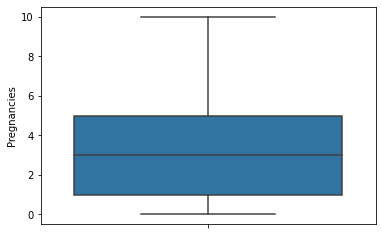

In [11]:
sns.boxplot(y='Pregnancies',data=dat1)

<AxesSubplot:ylabel='Glucose'>

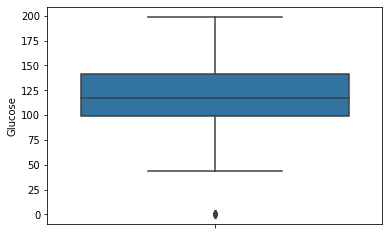

In [17]:
sns.boxplot(y='Glucose',data=diabetes_df)

In [20]:
#Treating outliers or Glucose

diabetes_df['Glucose'].mean()

121.1825

In [19]:
dat2=diabetes_df[diabetes_df['Glucose']>10]

<AxesSubplot:ylabel='Glucose'>

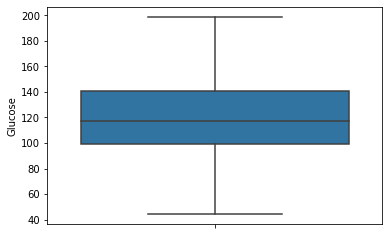

In [21]:
sns.boxplot(y='Glucose',data=dat2)

<AxesSubplot:ylabel='BloodPressure'>

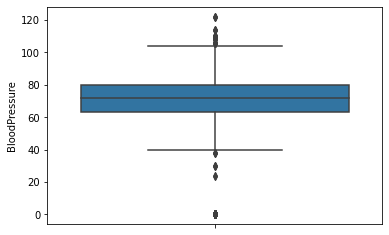

In [49]:
sns.boxplot(y='BloodPressure',data=diabetes_df)

In [23]:
#Treating outliers for BloodPressure


diabetes_df['BloodPressure'].mean()

69.1455

<AxesSubplot:ylabel='BloodPressure'>

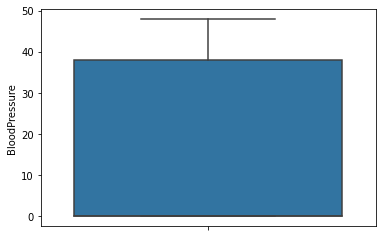

In [25]:
dat3=diabetes_df[diabetes_df['BloodPressure']<50][diabetes_df['BloodPressure']<100]
sns.boxplot(y='BloodPressure',data=dat3)

<AxesSubplot:ylabel='SkinThickness'>

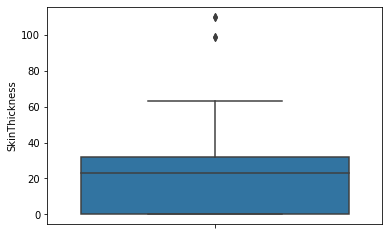

In [27]:
sns.boxplot(y='SkinThickness',data=diabetes_df)

In [28]:
#Treating outliers for SkinThickness

diabetes_df['SkinThickness'].mean()

20.935

<AxesSubplot:ylabel='SkinThickness'>

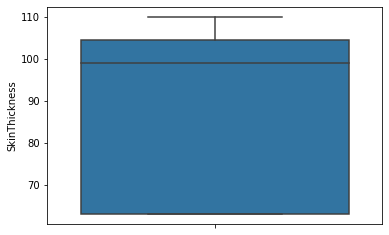

In [29]:
dat4=diabetes_df[diabetes_df['SkinThickness']>60]
sns.boxplot(y='SkinThickness',data=dat4)

<AxesSubplot:ylabel='Insulin'>

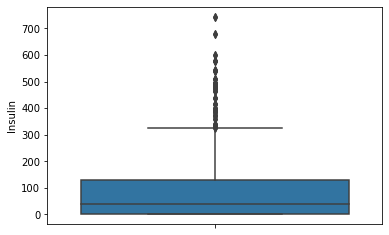

In [30]:
sns.boxplot(y='Insulin',data=diabetes_df)

In [31]:
#Treating outliers for Insulin

diabetes_df['Insulin'].mean()

80.254

<AxesSubplot:ylabel='Insulin'>

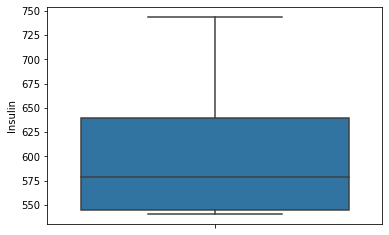

In [35]:
dat5=diabetes_df[diabetes_df['Insulin']>525]
sns.boxplot(y='Insulin',data=dat5)

<AxesSubplot:ylabel='BMI'>

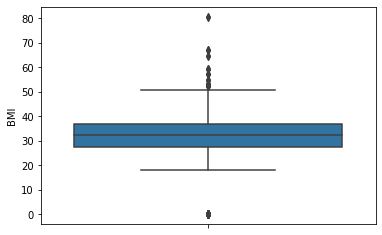

In [36]:
sns.boxplot(y='BMI',data=diabetes_df)

In [38]:
#reating outliers for BMI

diabetes_df['BMI'].mean()

32.192999999999984

<AxesSubplot:ylabel='BMI'>

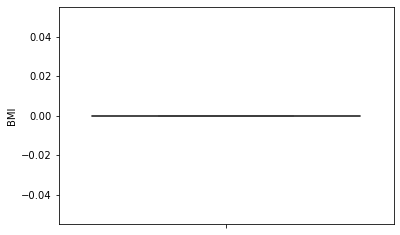

In [39]:
dat6=diabetes_df[diabetes_df['BMI']<10][diabetes_df['BMI']<50]
sns.boxplot(y='BMI',data=dat6)

<AxesSubplot:ylabel='DiabetesPedigreeFunction'>

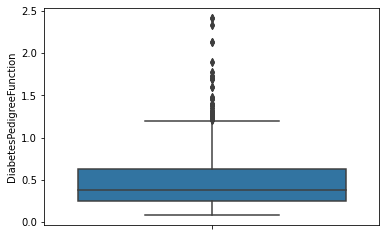

In [40]:
sns.boxplot(y='DiabetesPedigreeFunction',data=diabetes_df)

In [41]:
#Treating outliers for DiabetesPedigreeFunction

diabetes_df['DiabetesPedigreeFunction'].mean()

0.47092999999999974

<AxesSubplot:ylabel='DiabetesPedigreeFunction'>

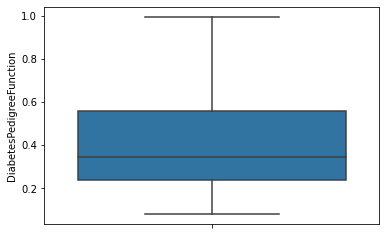

In [42]:
dat7=diabetes_df[diabetes_df['DiabetesPedigreeFunction']<1.0]
sns.boxplot(y='DiabetesPedigreeFunction',data=dat7)

<AxesSubplot:ylabel='Age'>

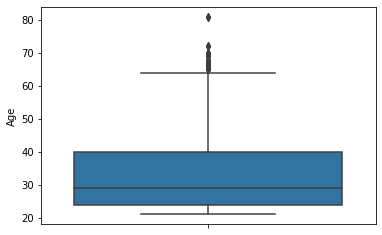

In [43]:
sns.boxplot(y='Age',data=diabetes_df)

In [44]:
#Treating outliers for Age

diabetes_df['Age'].mean()

33.0905

<AxesSubplot:ylabel='Age'>

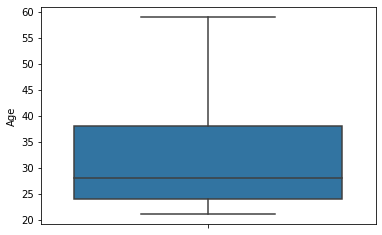

In [45]:
dat8=diabetes_df[diabetes_df['Age']<60]
sns.boxplot(y='Age',data=dat8)

In [7]:
without_outlier = diabetes_df[(diabetes_df['Pregnancies']<=13) & (diabetes_df['Glucose'] > 0)
                              &(diabetes_df['SkinThickness'] <=70) & (diabetes_df['Insulin'] <=300)
                              &(diabetes_df['Age'] <=60)]
without_outlier.shape
                              

(1801, 9)

In [8]:
without_outlier = without_outlier[(without_outlier['BloodPressure'] >= 38)
                                  &(without_outlier['BloodPressure'] <= 103)]
without_outlier.shape
                            

(1682, 9)

<function matplotlib.pyplot.show(close=None, block=None)>

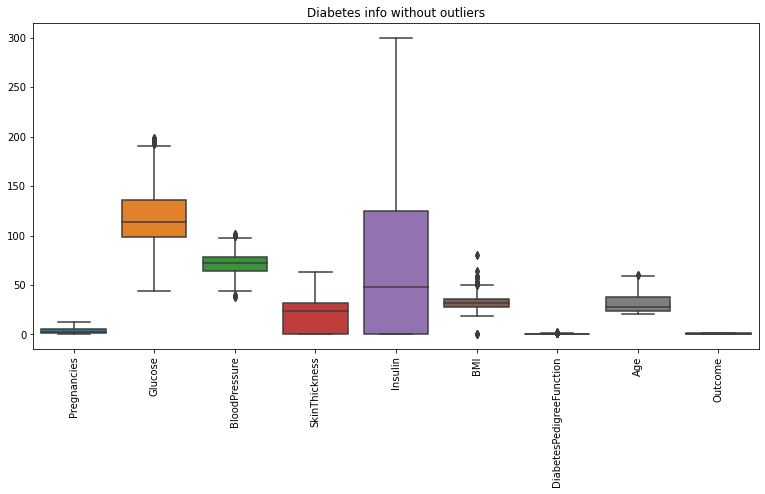

In [10]:
plt.figure(figsize=(13,6))
ax = sns.boxplot(data = without_outlier)
plt.xticks(rotation=90)
plt.title('Diabetes info without outliers')
plt.show

# Distribution for each value

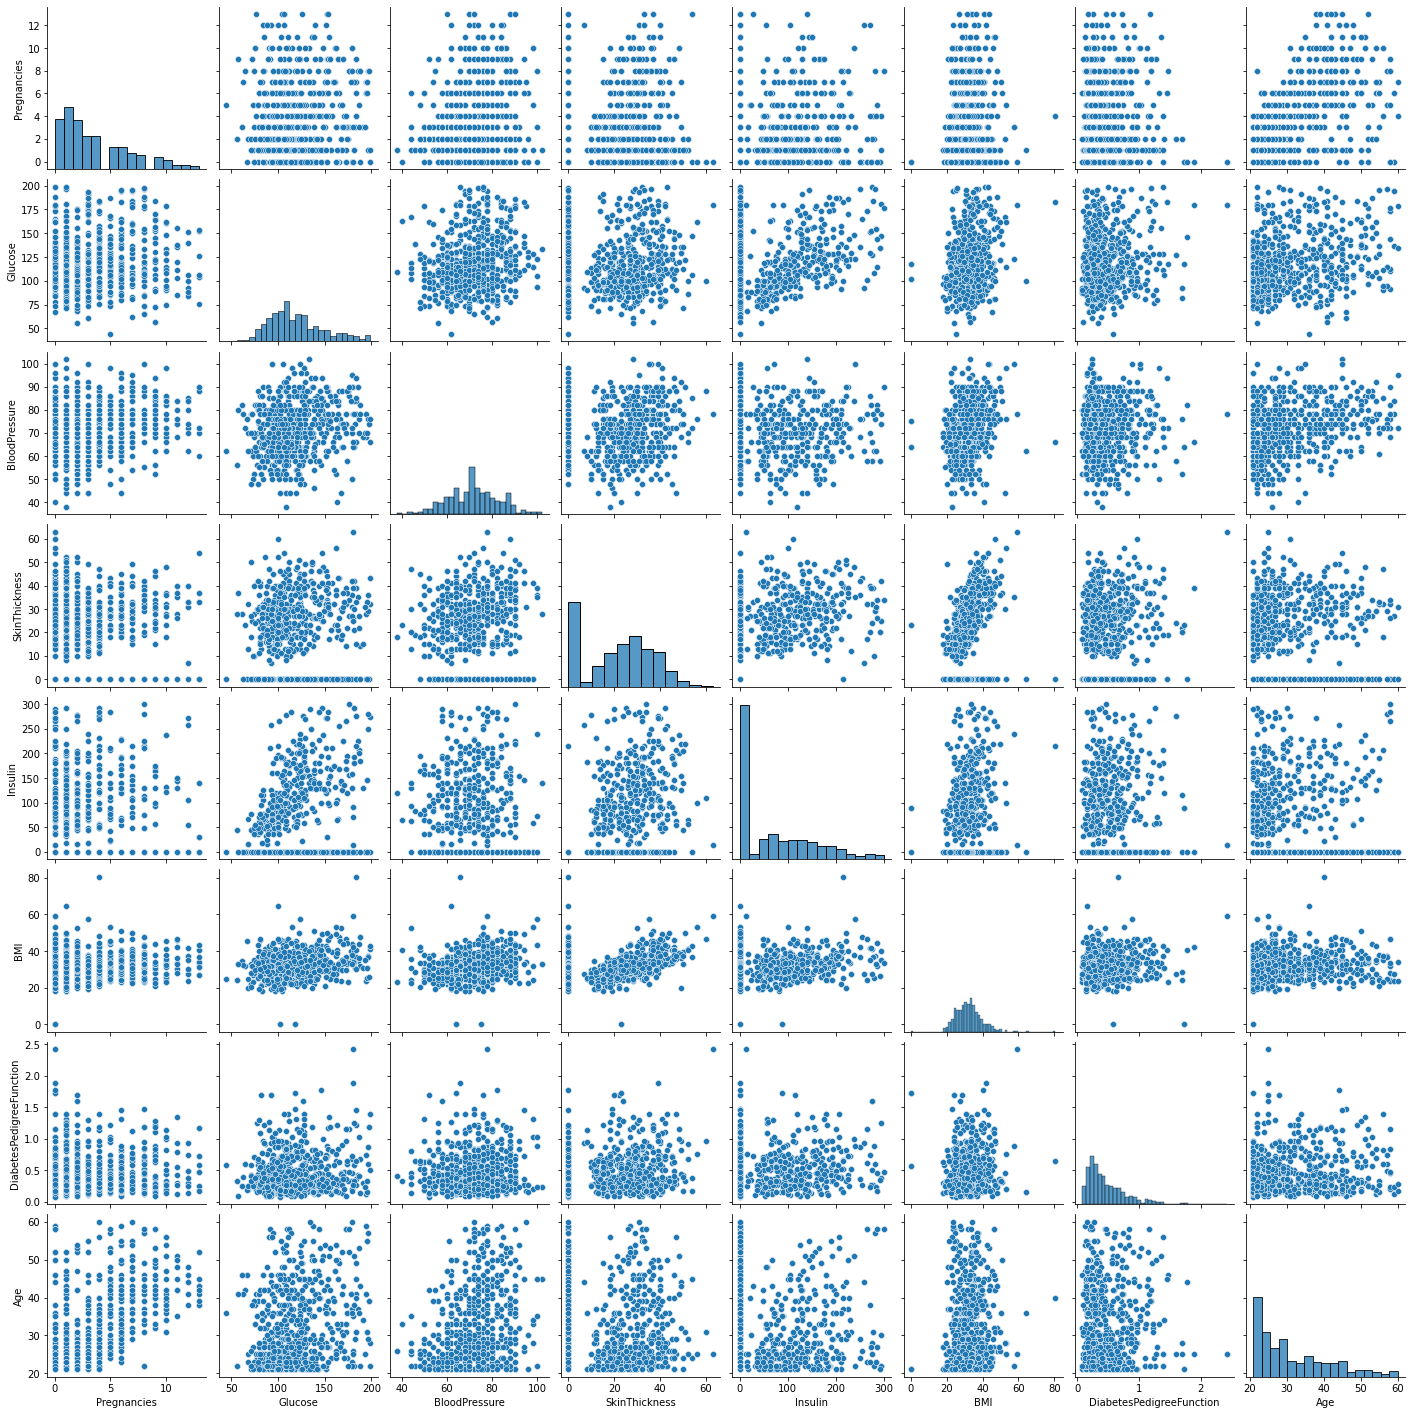

In [12]:
#pairplot for numeric columns 
numeric_columns_to_plot = without_outlier[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
sns.pairplot(numeric_columns_to_plot)
plt.show()

# Let's see the correlation between the variables

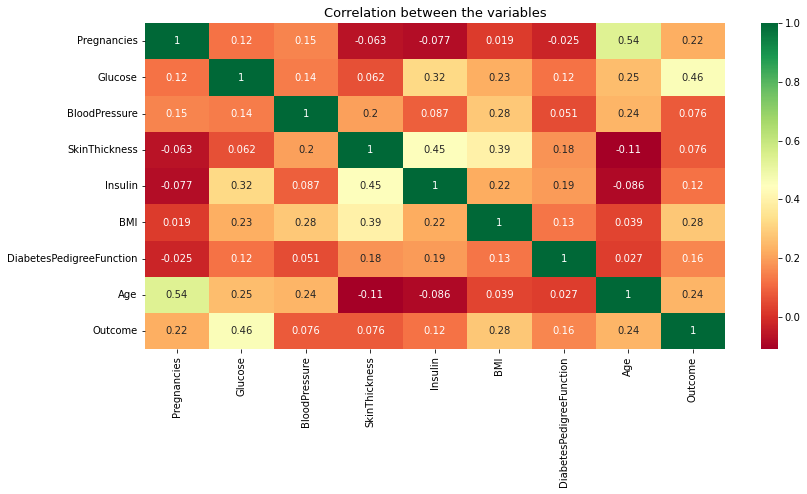

In [39]:
plt.figure(figsize=(13,6))
sns.heatmap(diabetes_df.corr(),
            annot=True,
            cmap='RdYlGn')
        
plt.title("Correlation between the variables", size=13)
plt.show()

# Model building

In [57]:
# Select the features
X = diabetes_df.drop('Outcome', axis=1)

# Select the label/target
y = diabetes_df['Outcome']

# Now we split data into test and train using the train_test_split function

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)

# Logistic Regression

In [28]:
features = diabetes_df.drop("Outcome", axis = 1)
target = diabetes_df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target,
                                                    test_size=0.25, 
                                                    random_state=111)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1500, 8)
(500, 8)
(1500,)
(500,)


In [26]:
# create and fit the model
lr_model = LogisticRegression(max_iter=10000)

print("################## TRAINING IN PROGRESS #######################")
lr_model.fit(X_train, y_train)

print("################## TRAINING DONE ########################")
# make prediction and print accuracy
prediction = lr_model.predict(X_test)
# print(accuracy_score(y_test, prediction))
# print(classification_report(y_test, prediction))
print(f"Training set score: {accuracy_score(y_train, lr_model.predict(X_train)):.3f}")
print(f"Test set score: {accuracy_score(y_test, lr_model.predict(X_test)):.3f}")

################## TRAINING IN PROGRESS #######################
################## TRAINING DONE ########################
Training set score: 1.000
Test set score: 0.953


 # Classification report and confusion matrix of LogisticRegression

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       346
           1       0.72      0.63      0.67       154

    accuracy                           0.81       500
   macro avg       0.78      0.76      0.77       500
weighted avg       0.81      0.81      0.81       500



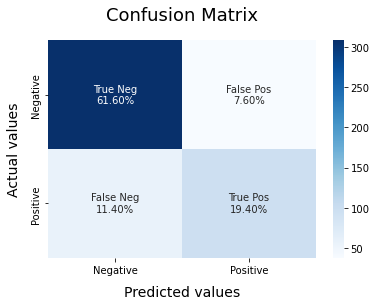

In [58]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
acc_lr= model_Evaluate(lr)


# Support Vector Machine

In [53]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

prediction from support vector machine model on the testing data

In [ ]:
svc_pred = svc_model.predict(X_test)

Accuracy score for SVM

In [51]:
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.788


# Classification report and confusion matrix of the SVM classifier

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[311  35]
 [ 71  83]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       346
           1       0.70      0.54      0.61       154

    accuracy                           0.79       500
   macro avg       0.76      0.72      0.73       500
weighted avg       0.78      0.79      0.78       500



# KNeigbhourclassifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)


print("################## TRAINING IN PROGRESS FOR SVM #######################")
clf.fit(X_train, y_train)

print("################## TRAINING DONE ########################")
# make prediction and print accuracy
#prediction = clf.predict(X_test)


print(f"Training set score: {accuracy_score(y_train, clf.predict(X_train)):.3f}")
print(f"Test set score: {accuracy_score(y_test, clf.predict(X_test)):.3f}")

################## TRAINING IN PROGRESS FOR SVM #######################
################## TRAINING DONE ########################
Training set score: 0.992
Test set score: 0.987


# # Classification report and confusion matrix of KNeigbhour model

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       346
           1       0.68      0.68      0.68       154

    accuracy                           0.80       500
   macro avg       0.77      0.77      0.77       500
weighted avg       0.80      0.80      0.80       500



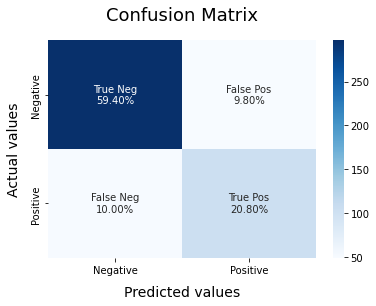

In [42]:
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
acc_kn= model_Evaluate(kn)

# Random Forest


Building the model using Random forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

Now after building the model let’s check the accuracy of the model on the training dataset.

In [60]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))


Accuracy_Score = 1.0


In [ ]:
Getting the accuracy score for Random Forest

In [61]:
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.984


# Classification report and confusion matrix of random forest model

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       346
           1       0.97      0.98      0.98       154

    accuracy                           0.99       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.99      0.99      0.99       500



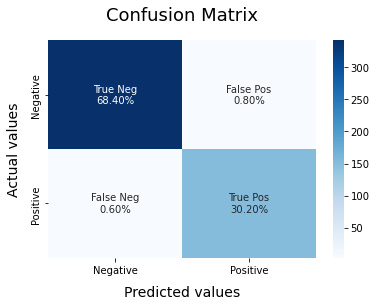

In [41]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
acc_rf= model_Evaluate(rf)

# DecisionTreeClassifier

In [55]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

Getting the accuracy score for Decision Tree

In [56]:
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.97


# Classification report and confusion matrix of Decision Tree model

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       346
           1       0.93      0.99      0.96       154

    accuracy                           0.97       500
   macro avg       0.96      0.98      0.97       500
weighted avg       0.98      0.97      0.97       500



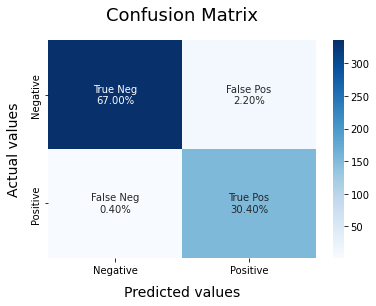

In [57]:
dc = DecisionTreeClassifier()
dc.fit(X_train, y_train)
acc_dc= model_Evaluate(dc)